In [89]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [90]:
#parameter setting
amp = 1 #range [0.0, 1.0]
sr = 10000 #sampling rate, Hz = 음질상 얼마나 고해상도로 하는가. 1초에 총 10000개의 숫자로 표현하겠다.
dur = 0.5 #in secondsa
freq = 100.0 #frequency = 1초에 태극문양이 몇번 반복되는가.

In [91]:
#어떻게 각도값을 만들어낼까? 0-2π
theta = np.arange(0, 2*np.pi, 0.1)
theta
#arange=숫자값리스트 만들때.
#2*np.pi이게 6.28...
#np.arange에 세번쨰논항 0.1추가하면 100배가 되지. 그럼 그래프가 더 자세해짐.

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

In [92]:
s = np.sin(theta)
s

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

<IPython.core.display.Javascript object>


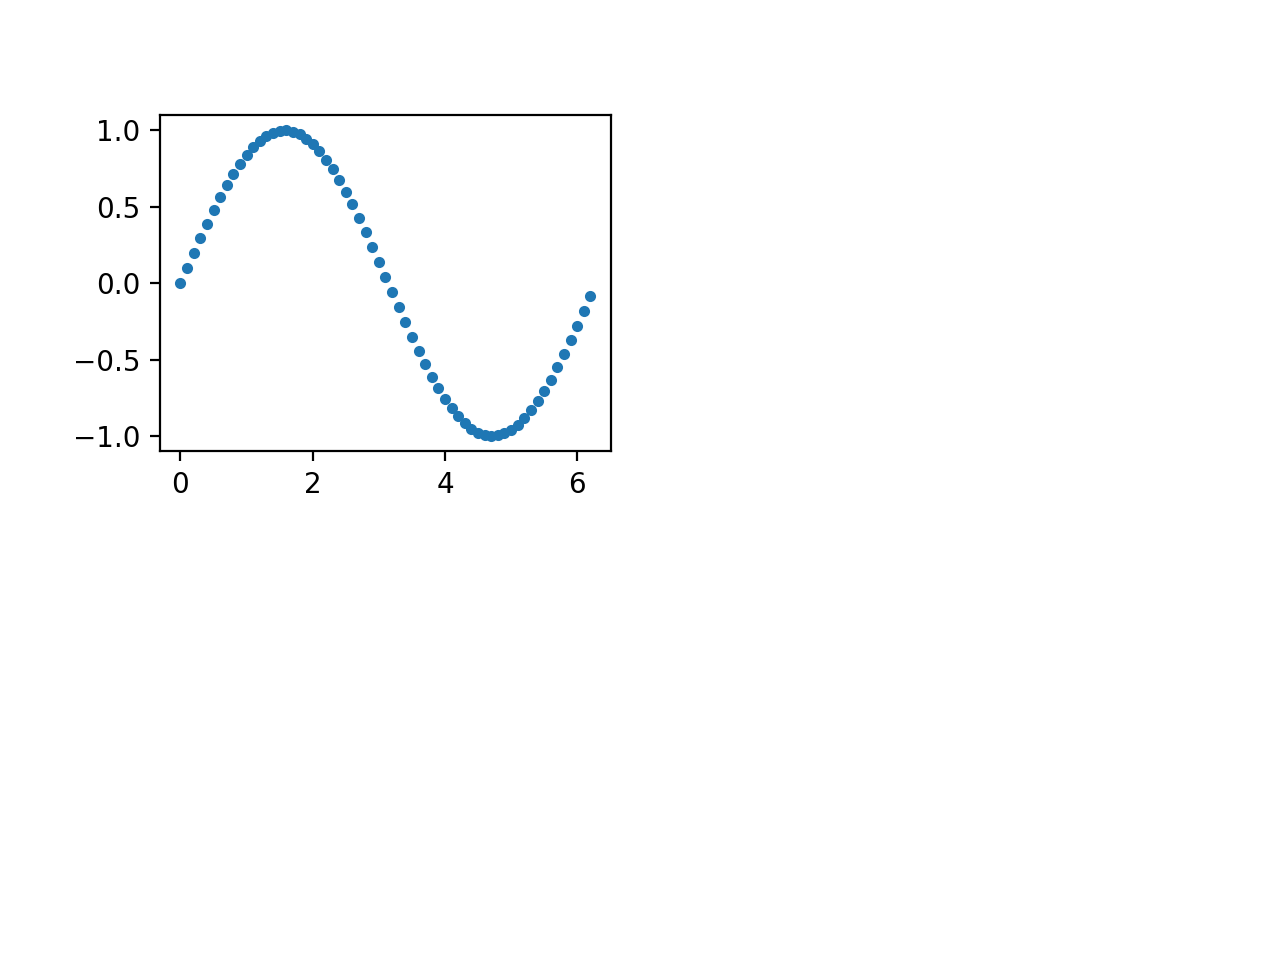

<IPython.core.display.Javascript object>


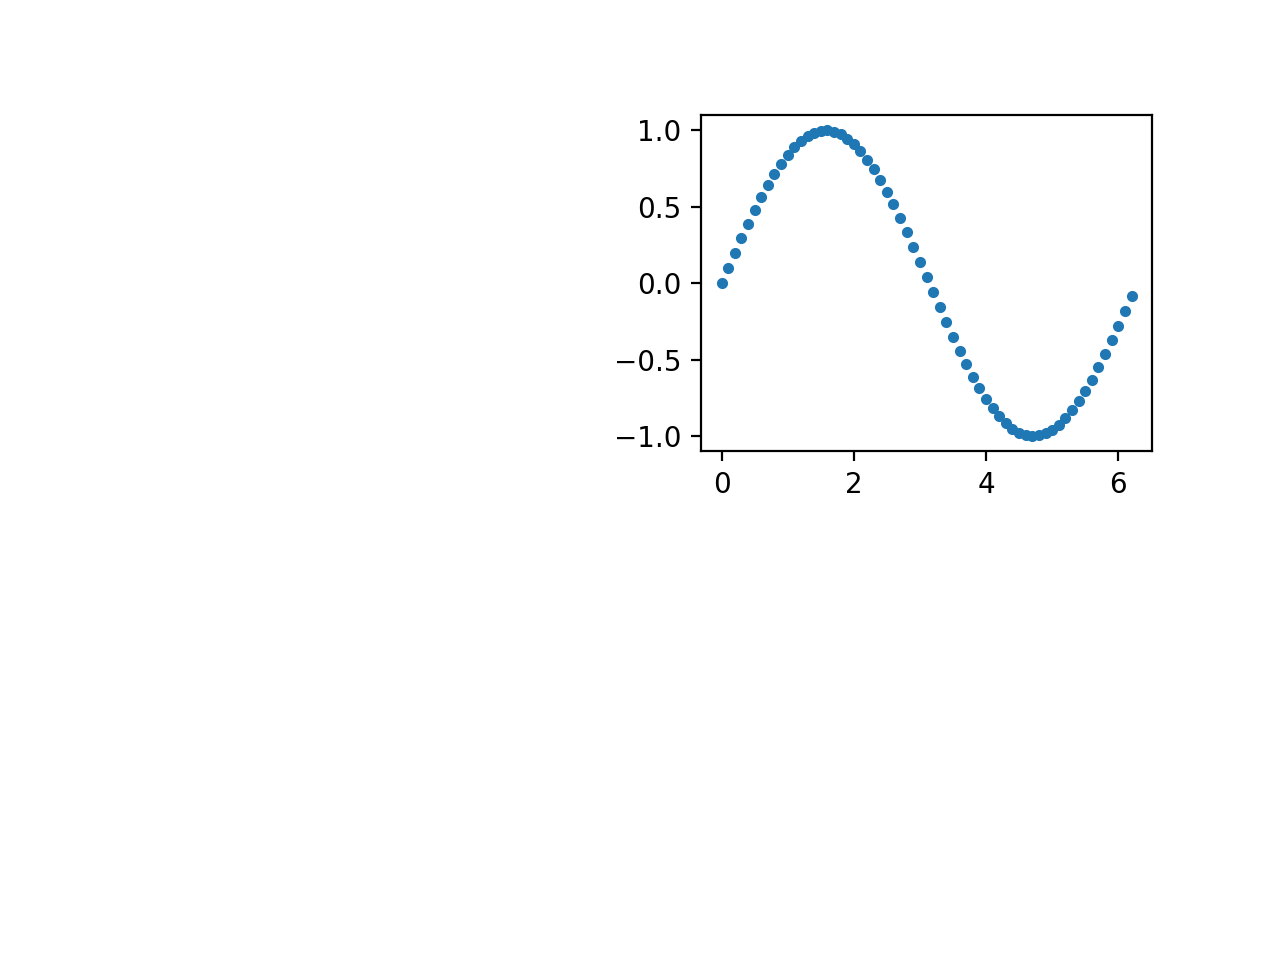

<IPython.core.display.Javascript object>


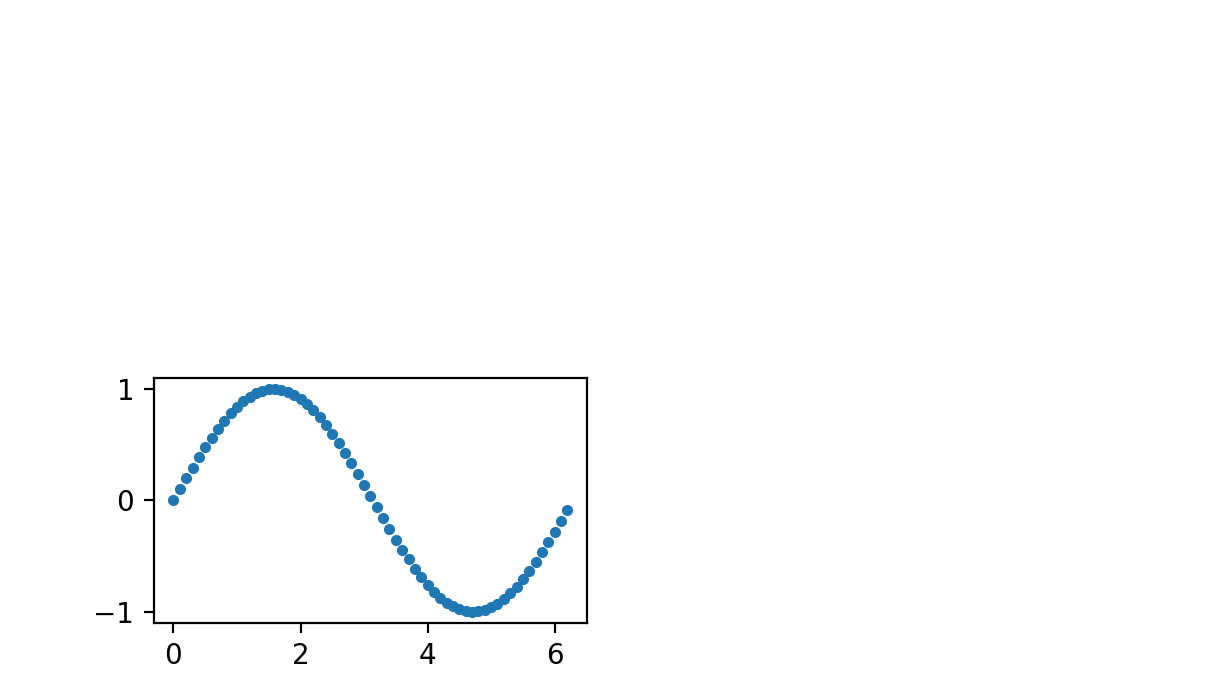

<IPython.core.display.Javascript object>


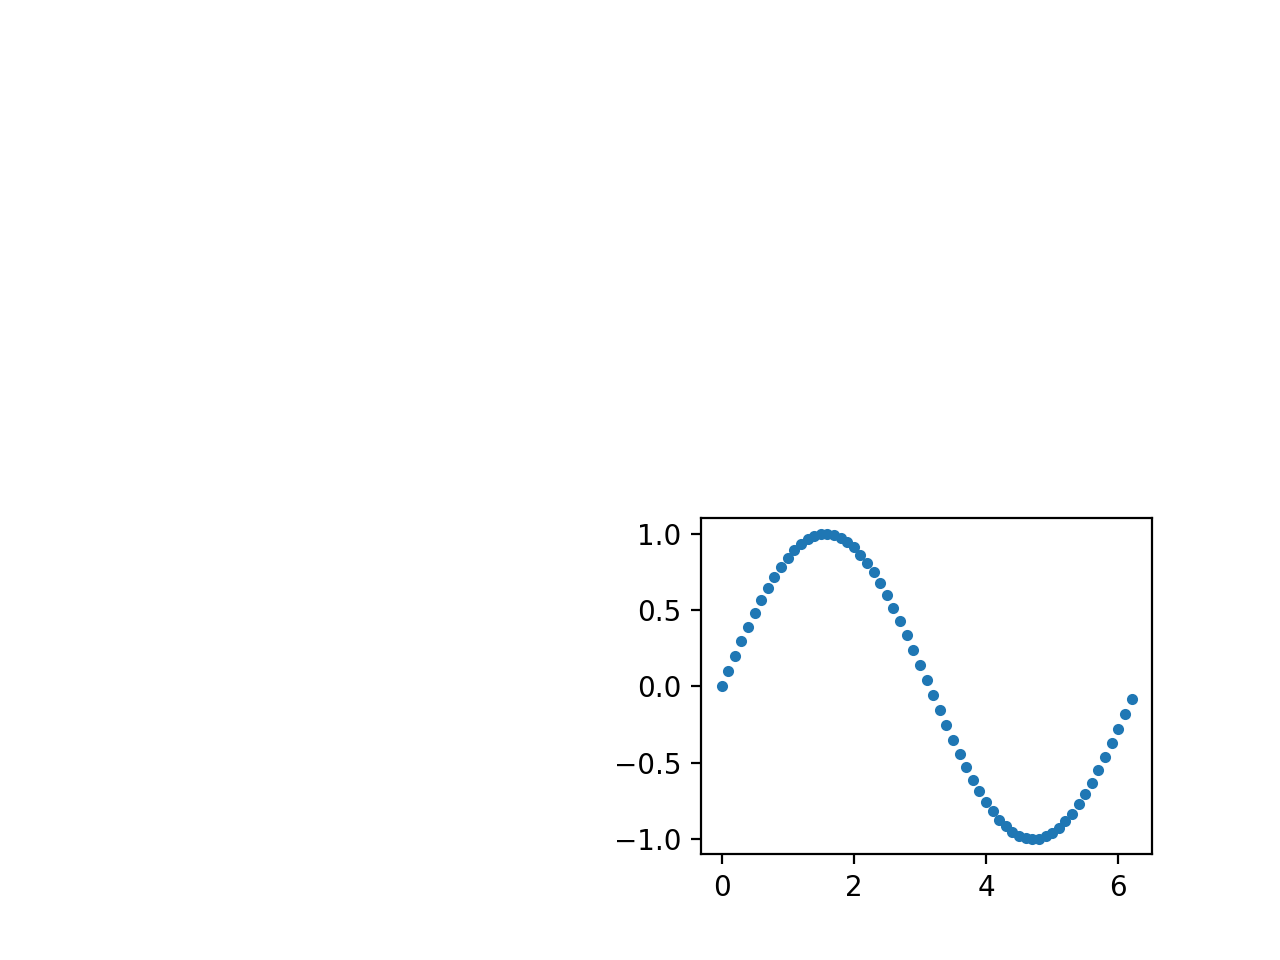

In [93]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.plot(theta, s, '.')
fig = plt.figure()
ax = fig.add_subplot(222)
ax.plot(theta, s, '.')
fig = plt.figure()
ax = fig.add_subplot(223)
ax.plot(theta, s, '.')
fig = plt.figure()
ax = fig.add_subplot(224)
ax.plot(theta, s, '.')
#subplot바로 밑에 plotting하려고 하는 x와 y값을 적어주면 됌.
#theta는 0부터 2파이까지 만든거고, s는 sin function의 아웃값.
#221 means 2*2에서 1번째.

<IPython.core.display.Javascript object>


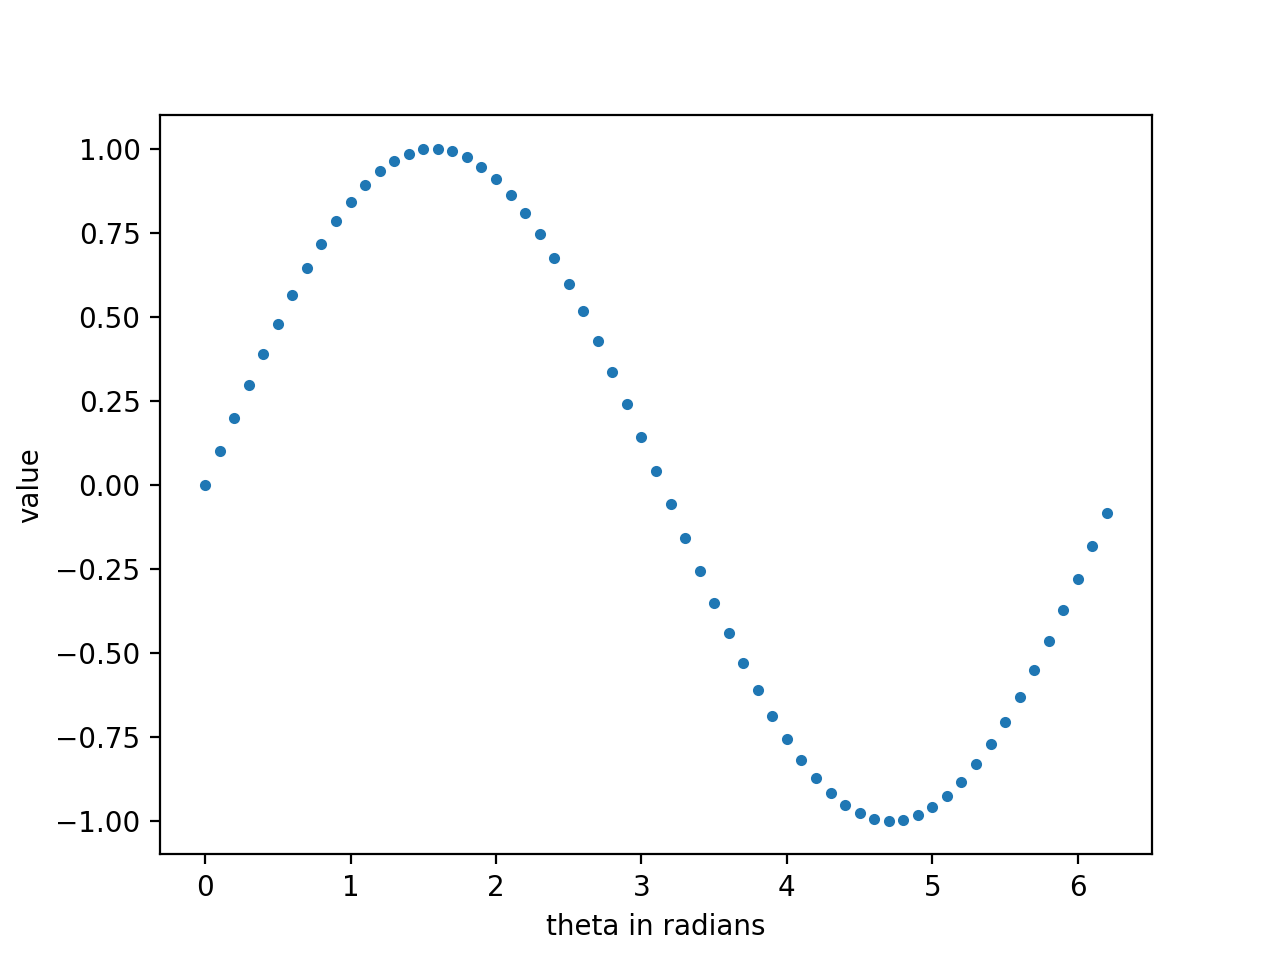

Text(0, 0.5, 'value')

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.') #얘를 '.'말고 '-'으로 바꾸면 점 아니고 한줄로 이어짐. default도 선.
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')
#x축상에서는 equi-distant, y축상에서는 equi-distant하지 않음. (시험)
#위의 말은 뭐랑 같을까? linear하는 경우에 그렇고 linear하지 않은 경우에 그렇지 않다.
#linear의 뜻은? line같이 생겼다. y=2x같은 그래프의 형태... 이때 x가 equidistant하면 y도 equidistant하다. 그냥 x와 y의 관계를 말하는 것
#이 아래의 그래프는 non-linear. linear한거는 y=ax+b의 형태인 것 뿐. 그것을 제외한 함수는 전부 non-linear.

<IPython.core.display.Javascript object>


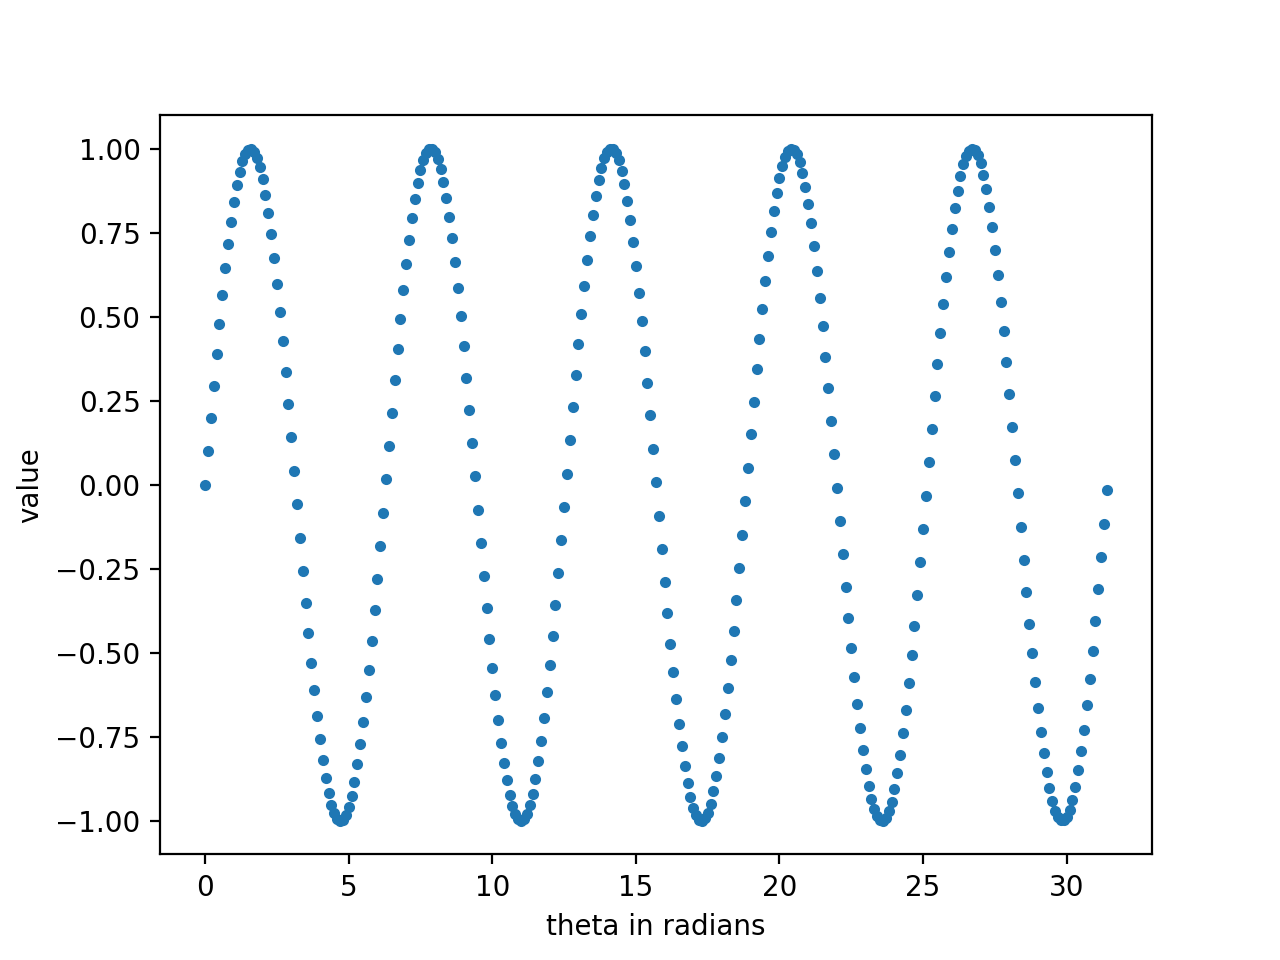

Text(0, 0.5, 'value')

In [83]:
theta = np.arange(0, 2*np.pi*5, 0.1)
s = np.sin(theta)
#10파이는 원래애가 5번 반복되는 형태
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta, s, '.')
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')

In [65]:
#GENERATE TIME!!
#소리는 시간이 반드시 있어야함.
#만약 1초라면 time tick의 개수는 sampling rate와 일치한다. (1,sr*1)
t = np.arange(1,sr*dur+1)/sr
#arange라는 평션이 젤 마지막거를 배제하니까 마지막에 +1 살짝 해줌.

In [67]:
#generate phase
theta = t*2*np.pi
#1초동안 한바퀴 돌아가는 걸 만들어라.
#뒤에 frequency를 곱해서 몇바퀴를 돌 것인가를 정해줌.
#위에서는 time의 개념이 들어가지 않았었는데, 여기는 들어갔지?
#타임 곱하기 2파이 곱하기 frequency해서 time을 연동시킨다.

In [68]:
# generate signal by cosine-phasor
s = np.sin(theta)

<IPython.core.display.Javascript object>


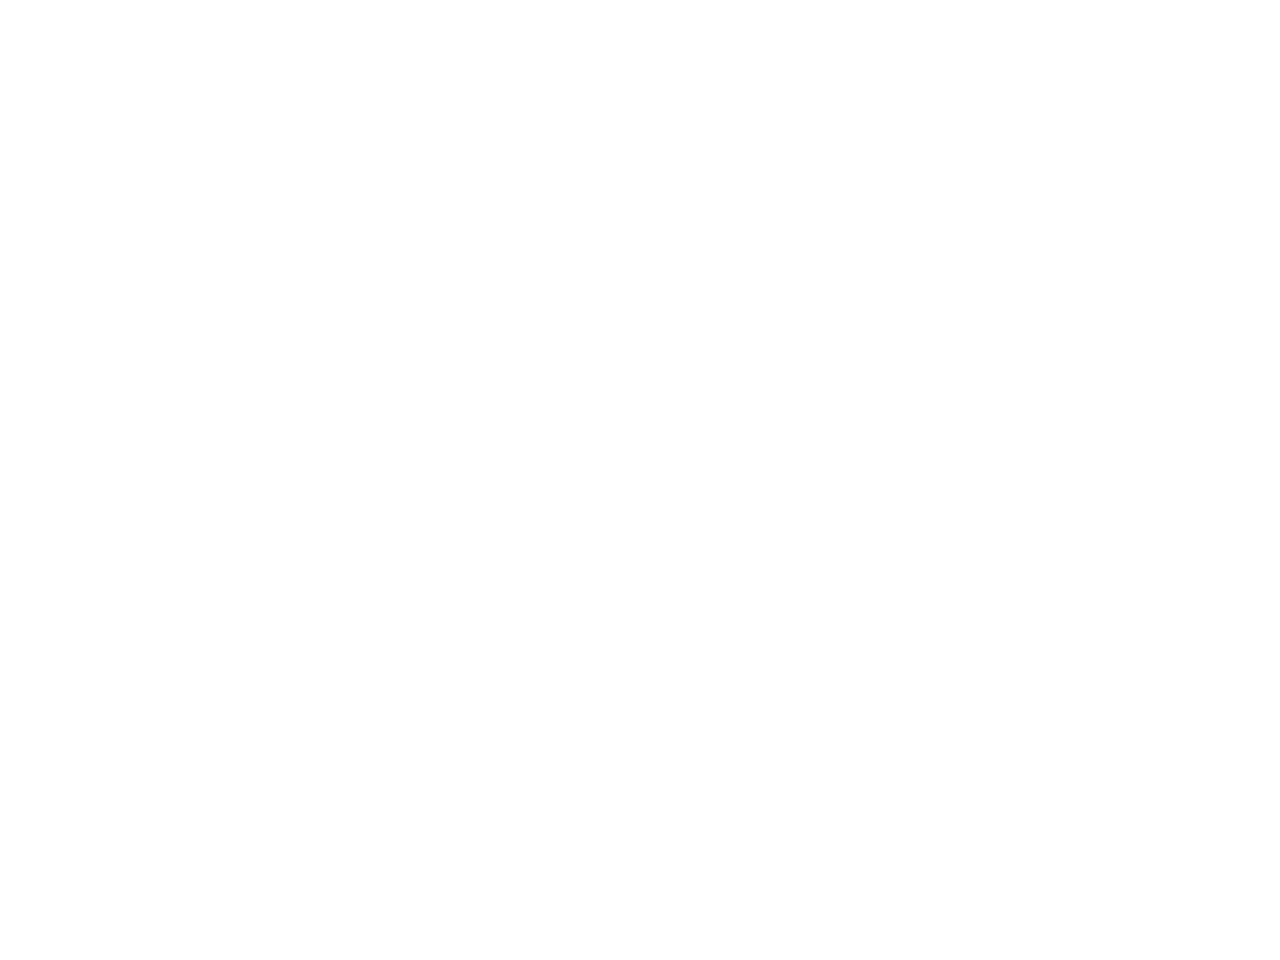

ValueError: x and y must have same first dimension, but have shapes (1000,) and (315,)

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.') #5000개 다 하는게 아니라 1000개만
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
#시험) 여기있는 점들의 개수는? 딱 천개!
#그래프 모양 왜 다르지ㅜㅜ

In [88]:
#generate signal by complex-phasor
c = np.exp(theta*1j)
#1j = i라고 생각하면 됨.
#np.exp는 고정이고 e라고 생각하면 됨. theta값만 바뀌어서 들어감. 나머지는 고정
c
#하나하나의 값들이 엄청 긴 벡터값. 근데 생략이 되어있지. a + bi의 형태! j나 i나 똑같으니까.
#e-01은 1/10
#복소수의 벡터가 쭈루룩 들어가 있구나 라고 생각하면 됨.

array([ 1.        +0.j        ,  0.99500417+0.09983342j,
        0.98006658+0.19866933j,  0.95533649+0.29552021j,
        0.92106099+0.38941834j,  0.87758256+0.47942554j,
        0.82533561+0.56464247j,  0.76484219+0.64421769j,
        0.69670671+0.71735609j,  0.62160997+0.78332691j,
        0.54030231+0.84147098j,  0.45359612+0.89120736j,
        0.36235775+0.93203909j,  0.26749883+0.96355819j,
        0.16996714+0.98544973j,  0.0707372 +0.99749499j,
       -0.02919952+0.9995736j , -0.12884449+0.99166481j,
       -0.22720209+0.97384763j, -0.32328957+0.94630009j,
       -0.41614684+0.90929743j, -0.5048461 +0.86320937j,
       -0.58850112+0.8084964j , -0.66627602+0.74570521j,
       -0.73739372+0.67546318j, -0.80114362+0.59847214j,
       -0.85688875+0.51550137j, -0.90407214+0.42737988j,
       -0.94222234+0.33498815j, -0.97095817+0.23924933j,
       -0.9899925 +0.14112001j, -0.99913515+0.04158066j,
       -0.99829478-0.05837414j, -0.98747977-0.15774569j,
       -0.96679819-0.2555411j ,

<IPython.core.display.Javascript object>


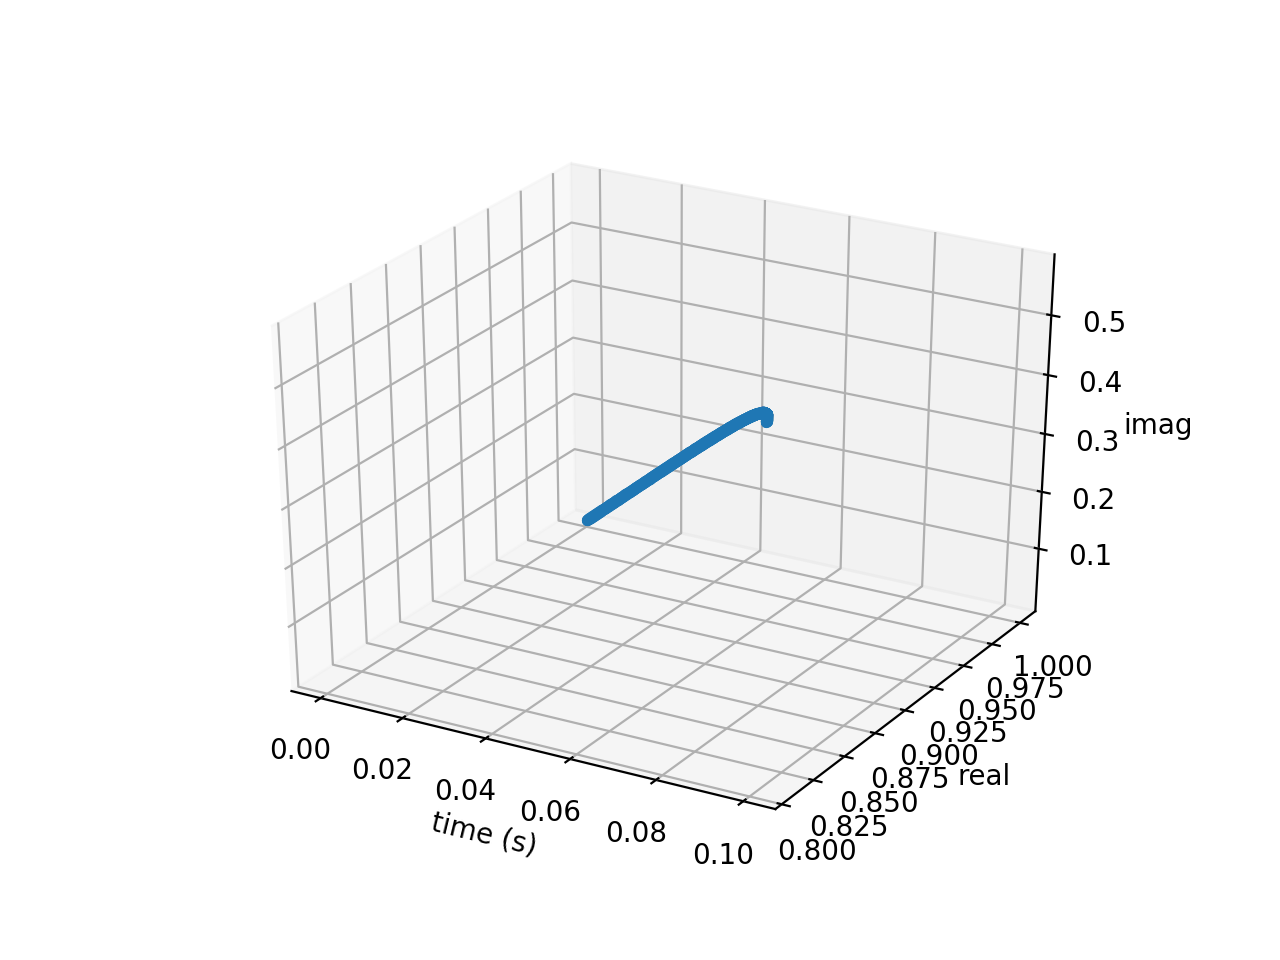

Text(0.5, 0, 'imag')

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.') #2차원은 '.'빼고 입력이 2개였는데 이건 3개지?
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')
#t[0:1000], c.real[0:1000], c.imag[0:1000]이 각각의 값들은 서로 개수가 corresponding해야함.
#각각 1000개씩.
#c.real하면 a+bi에서 a만 쏙 빼오는 역할. 0.9921147만 빼오고 / c.imag는 +1.25333234e-01j값만  빼오는 것.
#real만 보면 위에서 내려다 볼때. 

In [85]:
ipd.Audio(s,rate=sr)

In [86]:
ipd.Audio(c.imag,rate=sr)
#c.imag = sin과 똑같으니까 이렇게 해도 나옴